In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
import empyrical
import datetime as dt
%matplotlib inline

In [109]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [110]:
def metric(ret):
    print(empyrical.annual_return(ret))
    print(empyrical.annual_volatility(ret))
    print(empyrical.max_drawdown(ret))
    print(empyrical.sharpe_ratio(ret))

In [111]:
start_date = '2016-03-01'

In [112]:
end_date = dt.datetime.today().strftime('%Y-%m-%d')

# 计算行业基金收益率

In [113]:
sfund = pd.read_excel('../data/基金池.xlsx', sheet_name='行业')

In [114]:
data = w.wsd(sfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [115]:
sfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [116]:
sfund_nav_ret = sfund_nav.pct_change()

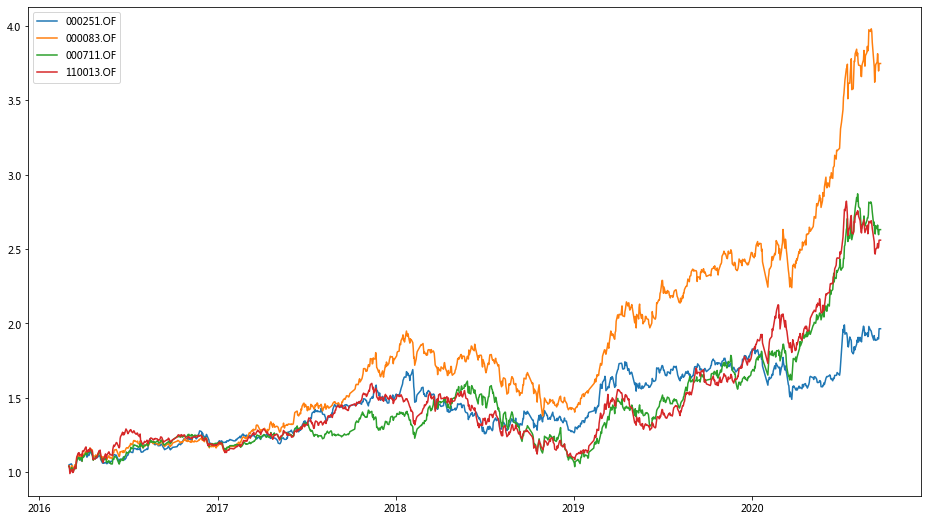

In [117]:
(1 + sfund_nav_ret).cumprod().plot(figsize=(16, 9))

In [118]:
sector_fund_ret = 0.2 * sfund_nav_ret[sfund[sfund['tag'] == '金融地产']['code']].mean(axis=1) + \
                  0.3 * sfund_nav_ret[sfund[sfund['tag'] == '可选消费']['code']].mean(axis=1) + \
                  0.2 * sfund_nav_ret[sfund[sfund['tag'] == '必选医药']['code']].mean(axis=1) + \
                  0.3 * sfund_nav_ret[sfund[sfund['tag'] == '信息科技']['code']].mean(axis=1)

# 计算全市场基金收益率

In [119]:
fund = pd.read_excel('../data/基金池.xlsx', sheet_name='全市场')

In [120]:
data = w.wsd(fund['code'].tolist(), 'nav_adj', start_date, end_date)

In [121]:
fund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [122]:
fund_ret = fund_nav.pct_change()

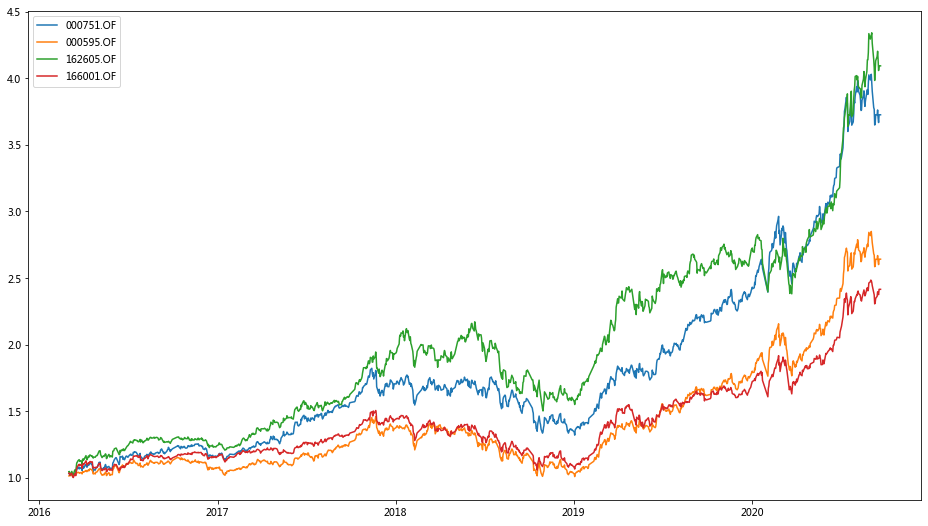

In [123]:
(1 + fund_ret).cumprod().plot(figsize=(16, 9))

In [124]:
fund_pf_ret = fund_ret.mean(axis=1)

# 计算债券基金收益率

In [125]:
bfund = pd.read_excel('../data/基金池.xlsx', sheet_name='债券')

In [126]:
data = w.wsd(bfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [127]:
bfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [128]:
bfund_ret = bfund_nav.pct_change()

In [129]:
bfund_pf_ret = bfund_ret.mean(axis=1)

# 计算组合收益率

In [130]:
pf_ret_28 = 0.8 * bfund_pf_ret + 0.1 * sector_fund_ret + 0.1 * fund_pf_ret
pf_ret_55 = 0.5 * bfund_pf_ret + 0.25 * sector_fund_ret + 0.25 * fund_pf_ret
pf_ret_82 = 0.2 * bfund_pf_ret + 0.4 * sector_fund_ret + 0.4 * fund_pf_ret

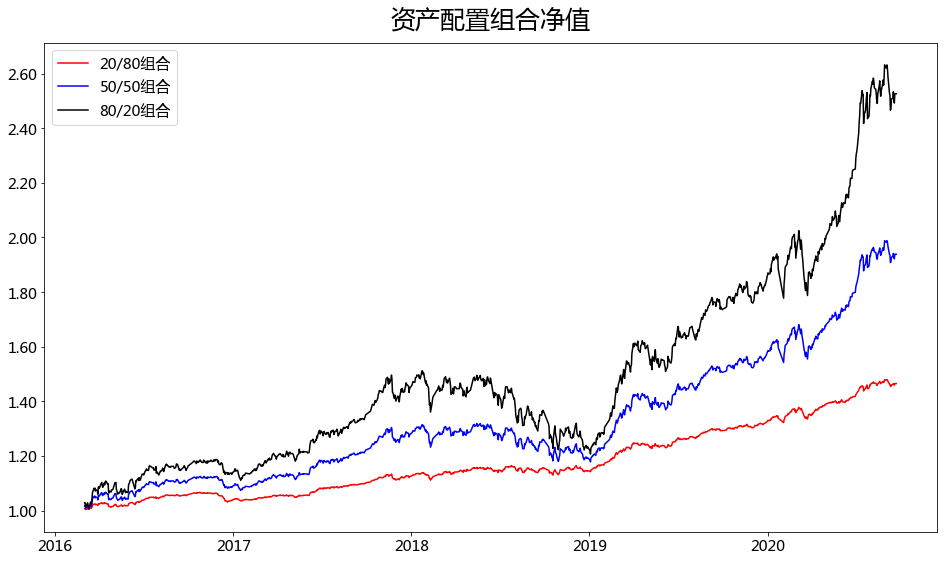

In [131]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret_28).cumprod(), label='20/80组合', color='red')
ax.plot((1 + pf_ret_55).cumprod(), label='50/50组合', color='blue')
ax.plot((1 + pf_ret_82).cumprod(), label='80/20组合', color='black')

ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title('资产配置组合净值', fontsize=25, y=1.02)

In [132]:
metric(pf_ret_28)

0.09018917193936438
0.04132023236430357
-0.03369719348793974
2.1126804794186023


In [133]:
metric(pf_ret_55)

0.1613720291725651
0.09900645994110034
-0.10619383406075497
1.5623327288004274


In [134]:
metric(pf_ret_82)

0.23295816823890325
0.15726524199865582
-0.20169701464594567
1.4120451176242241
